In [216]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import itertools
import seaborn as sns
import matplotlib.pyplot as plt


<h1>Population Dataset <br></h1>
Sheet1 => content page <br>
Sheet2 => Singapore Residents By Age Group, Ethnic Group And Sex, End June, Annual <br>
Sheet3 => Singapore Citizens By Age Group, Ethnic Group And Sex, End June, Annual <br>
Sheet4 => Singapore Residents By Single Year Of Age And Sex, At End June, Annual <br>
Sheet5 => Residents By Age Group & Type Of Dwelling, Annual <br>
Sheet6 => Indicators On Population, Annual <br>



<h1>Data required for this project:</h1>
<ul>
<li>Property Price Distribution (Given)</li>
<li>Singapore Residents By Age Group, Ethnic Group And Sex, End June, Annual (Self Sourced)</li>
<li>Residents By Age Group & Type Of Dwelling, Annual (Self Sourced)</li>
<li>Indicators On Population, Annual (Self Sourced)</li>
</ul>

In [202]:
# population indicator df
# import data and transpose
population = pd.read_csv("./population_indicators.csv").transpose()
# select data up to the year 2000
population = population.loc[:'2000']
# Rename first row as columns
population = population.rename(columns = population.iloc[0]).drop(population.index[0])
# population = population.drop(population.columns[6:],axis=1)
population = population.applymap(lambda x: int(x.replace(',', '')) if not '.' in x else float(x))
# drop all column names with Ratio since they are collinear with the population data
population = population[[x for x in list(
    population.columns) if 'ratio' not in x.lower() ]]
population.head()


,Total Population (Number),Resident Population (Number),Singapore Citizen Population (Number),Permanent Resident Population (Number),Non-Resident Population (Number),Total Population Growth (Per Cent),Resident Population Growth (Per Cent),Population Density (Total Population Per Square Kilometre),Median Age Of Resident Population (Years),Median Age Of Citizen Population (Years),Natural Increase (Number),Rate Of Natural Increase (Per Thousand Residents)
2021,5453566,3986842,3498191,488651,1466724,-4.1,-1.4,7485,41.8,42.5,14431,2.7
2020,5685807,4044210,3523191,521019,1641597,-0.3,0.4,7810,41.5,42.2,16536,3.3
2019,5703569,4026209,3500940,525269,1677360,1.2,0.8,7866,41.1,42.0,17833,3.7
2018,5638676,3994283,3471936,522347,1644393,0.5,0.7,7804,40.8,41.7,17757,3.7
2017,5612253,3965796,3439177,526619,1646457,0.1,0.8,7796,40.5,41.3,18710,4.0


In [139]:
# dewlling df
# import data and transpose
dwellings = pd.read_csv("./dwellings.csv").transpose()
# make first row as columns
dwellings = dwellings.rename(
    columns=dwellings.iloc[0]).drop(dwellings.index[0])
# map values to int
dwellings = dwellings.applymap(lambda x: int(x.replace(',','')))
dwellings = dwellings.drop(['Residents'],axis=1)
dwellings.head()
# lets group the dewlling infomation by age groups


,Total HDB Dwellings,HDB 1- And 2-Room Flats,HDB 3-Room Flats,HDB 4-Room Flats,HDB 5-Room And Executive Flats,Condominiums & Other Apartments,Landed Properties,Other Types Of Dwelling,0-4 Years,Total HDB Dwellings,...,Other Types Of Dwelling,90 Years & Over,Total HDB Dwellings,HDB 1- And 2-Room Flats,HDB 3-Room Flats,HDB 4-Room Flats,HDB 5-Room And Executive Flats,Condominiums & Other Apartments,Landed Properties,Other Types Of Dwelling
2021,3090959,179559,557100,1312346,1041954,620246,240841,34796,178435,138502,...,2370,22090,15440,1736,4147,5632,3925,1363,2613,2674
2020,3152410,177358,575200,1338374,1061478,607937,248860,35003,183076,144145,...,2310,20875,14636,1655,3890,5346,3745,1255,2453,2531
2019,3154524,173771,580233,1337743,1062777,587860,249077,34748,185355,146195,...,2080,19429,13540,1569,3570,4898,3503,1187,2271,2431
2018,3149249,170955,584821,1331440,1062033,562228,248240,34566,185528,147012,...,2019,17786,12414,1449,3262,4463,3240,1094,2080,2198
2017,3156575,168052,590806,1330160,1067557,525584,249408,34229,187653,150516,...,1910,16454,11462,1345,3041,4140,2936,1037,1916,2039


In [140]:
# save the column index range for children, adult and elderly data
dwellingsAgeGroupColumns = list(dwellings.columns)[8:]
dwellingAgeGroupArr = {'Children': [],
                       'Adult': [], 'Elderly': []}
for i in range(len(list(dwellings.columns))//9):
    a = dwellingsAgeGroupColumns[i*9:i*9+9]
    if '-' in a[0][:2] or a[0][:2] < '15':
        dwellingAgeGroupArr['Children'].append([8+i*9,8+i*9+9])
    elif a[0][:2] < '65':
        dwellingAgeGroupArr['Adult'].append([8+i*9, 8+i*9+9])
    else:
        dwellingAgeGroupArr['Elderly'].append([8+i*9,8+i*9+9])


In [141]:
premadeColumnNames = ['_Dwellers', '_Total HDB Dwellings', '_HDB 1 And 2 Room Flats',   '_HDB 3-Room Flats',	  '_HDB 4-Room Flats',
                      '_HDB 5-Room And Executive Flats',   '_Condominiums & Other Apartments',   '_Landed Properties',   '_Other Types Of Dwelling']


def sumColumns(group):
    dummy = pd.DataFrame({})
    for rg in dwellingAgeGroupArr[group]:
        df = dwellings.iloc[:, rg[0]:rg[1]].copy()
        df.columns = premadeColumnNames
        if dummy.empty:
            dummy = df
        else:
            dummy += df
        # print(dwellings.iloc[:,rg[0]:rg[1]])
    dummy.columns = [f'{group}{x}' for x in list(dummy.columns)]
    return dummy
    
# sum these data together and form 1 dataFrame
dwellingsByAgeGroup = pd.concat(
    [sumColumns('Children'), sumColumns('Adult'), sumColumns('Elderly')], axis=1)
dwellingsByAgeGroup.head()

,Children_Dwellers,Children_Total HDB Dwellings,Children_HDB 1 And 2 Room Flats,Children_HDB 3-Room Flats,Children_HDB 4-Room Flats,Children_HDB 5-Room And Executive Flats,Children_Condominiums & Other Apartments,Children_Landed Properties,Children_Other Types Of Dwelling,Adult_Dwellers,...,Adult_Other Types Of Dwelling,Elderly_Dwellers,Elderly_Total HDB Dwellings,Elderly_HDB 1 And 2 Room Flats,Elderly_HDB 3-Room Flats,Elderly_HDB 4-Room Flats,Elderly_HDB 5-Room And Executive Flats,Elderly_Condominiums & Other Apartments,Elderly_Landed Properties,Elderly_Other Types Of Dwelling
2021,577188,425749,22955,55975,191418,155401,118271,31296,1872,2770646,...,16516,639008,516327,49856,127231,196767,142473,53813,52460,16408
2020,588206,440318,22918,60629,197746,159025,114460,31325,2103,2841636,...,17076,614368,495212,47395,123935,188040,135842,51756,51576,15824
2019,591056,445622,22900,63091,198448,161183,111735,31538,2161,2853473,...,17436,581680,468794,44547,119547,177189,127511,48242,49493,15151
2018,591124,450566,23322,64978,197989,164277,106746,31471,2341,2855305,...,17779,547854,441018,41773,114477,166071,118697,45113,47277,14446
2017,594481,461039,23779,67293,199711,170256,99011,31918,2513,2854623,...,18448,516692,416206,38987,109977,156073,111169,41694,45524,13268


In [142]:
# import data from csv
residents = pd.read_csv(
    "./singapore_residents_by_age_group_ethnicity_sex.csv")
# slice the df to only contain residents count from 2021 - 2000
residents = residents.loc[:18,:'2000']
# transpose
residents = residents.transpose()
# first row as column
residents = residents.rename(
    columns=residents.iloc[0]).drop(residents.index[0])



<p>
It is common in demography to split the population into three broad age groups:
<ul>
<li>children and young adolescents (under 15 years old)
<li>the working-age population (15-64 years) and.
<li>the elderly population (65 years and older)
</ul>
</p>
Source: <a>https://ourworldindata.org/age-structure</a>


In [143]:
# group residents by age
# make group by column names
ageGroup = {'Children Residents': [], 'Adult Residents': [], 'Elderly Residents': []}
for col in residents.columns[1:].to_list():
    age = int(col.strip()[:2].strip())
    if age < 15:
        ageGroup['Children Residents'].append(residents.columns.to_list().index(col))
    elif age < 65:
        ageGroup['Adult Residents'].append(residents.columns.to_list().index(col))
    else:
        ageGroup['Elderly Residents'].append(residents.columns.to_list().index(col))

def makeAgeGroup(columns):
    # return sum([int(x.replace(',', '')) for x in columns[ageGroup['children']].to_list()])
    return [sum([int(x.replace(',', '')) for x in columns[ageGroup[key]].to_list()]) for key in ageGroup.keys()]

# apply makeAgeGroup function and split into 3 columns
ageGroupdf = pd.DataFrame(residents.apply(lambda x: makeAgeGroup(x), axis=1).to_list(), columns=list(ageGroup.keys()))
ageGroupdf.index = residents.index
residents = pd.concat([residents, ageGroupdf],axis=1)
# drop unnecessary columns
residents = residents.drop(residents.columns[list(
    itertools.chain(*list(ageGroup.values())))], axis=1)
# map Total Residents to int
residentsByAgeGroup = residents.drop(['Total Residents'], axis=1)
residentsByAgeGroup.head()


,Children Residents,Adult Residents,Elderly Residents
2021,577188,2770646,616918
2020,588206,2841636,593493
2019,591056,2853473,562251
2018,591124,2855305,530068
2017,594481,2854623,500238


In [203]:
populationDf = pd.concat(
    [population, residentsByAgeGroup, dwellingsByAgeGroup], axis=1)
populationDf.index = populationDf.index.astype('int64')
print(
    f'Number of rows with missing values: {populationDf.isnull().any(axis=1).mean()}')
populationFeatures = list(populationDf.columns)

Number of rows with missing values: 0.0


In [10]:
resale_data = pd.read_csv('./train.csv')

In [11]:
# since we are looking at the trend of property price, independent variables are sold year, flat type, dependent variable is resale price/sqm
resale_data.head()

,town,lat,lng,month,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,GEYLANG,NaN,NaN,2006-01-01,4 ROOM,328,UBI AVE 1,04 TO 06,84.0,Simplified,1985.0,175000.0,NaN
1,JURONG EAST,NaN,NaN,2003-02-01,5 ROOM,271,TOH GUAN RD,10 TO 12,120.0,Improved,1999.0,353000.0,NaN
2,TOA PAYOH,NaN,NaN,2005-09-01,3 ROOM,205,TOA PAYOH NTH,10 TO 12,65.0,Improved,1973.0,215000.0,NaN
3,PASIR RIS,NaN,NaN,2001-03-01,EXECUTIVE,508,PASIR RIS ST 52,04 TO 06,146.0,Apartment,1993.0,482000.0,NaN
4,JURONG WEST,NaN,NaN,2014-07-01,EXECUTIVE,656B,JURONG WEST ST 61,10 TO 12,133.0,Apartment,2001.0,613000.0,NaN


In [182]:
# def classifyModel(model):
#     if 'Maisonette' in model or 'Generation' in model:
#         return 'Maisonette'
#     elif 'Type' in model:
#         return 'Type'
#     elif 'Model' in model:
#         return 'Model'
#     elif 'Apartment' in model:
#         return 'Apartment'
#     else:
#         return model

resaledf = resale_data[['flat_type', 'month',
                            'floor_area_sqm', 'resale_price']].copy()
resaledf['month'] = pd.to_datetime(resaledf['month'])
resaledf['year_sold'] = resaledf['month'].dt.strftime(
    '%Y').astype('int64')
resaledf['price_per_sqm'] = resaledf['resale_price'] / \
    resaledf['floor_area_sqm']
resaledf = resaledf[resaledf['year_sold'] <=2021]
resaledf.drop(['month', 'floor_area_sqm',
                  'resale_price'], axis=1, inplace=True)
resaledf = resaledf.groupby(['year_sold', 'flat_type']).mean()
resaledf=resaledf.reset_index(level=[0,1])
resaledf=resaledf.pivot('year_sold','flat_type','price_per_sqm')
resaledf.index.name = 'year'


In [193]:
resaledf.index

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
           dtype='int64', name='year')

Text(0.5, 1.0, 'Resale Property Price trend from 2000 to 2020')

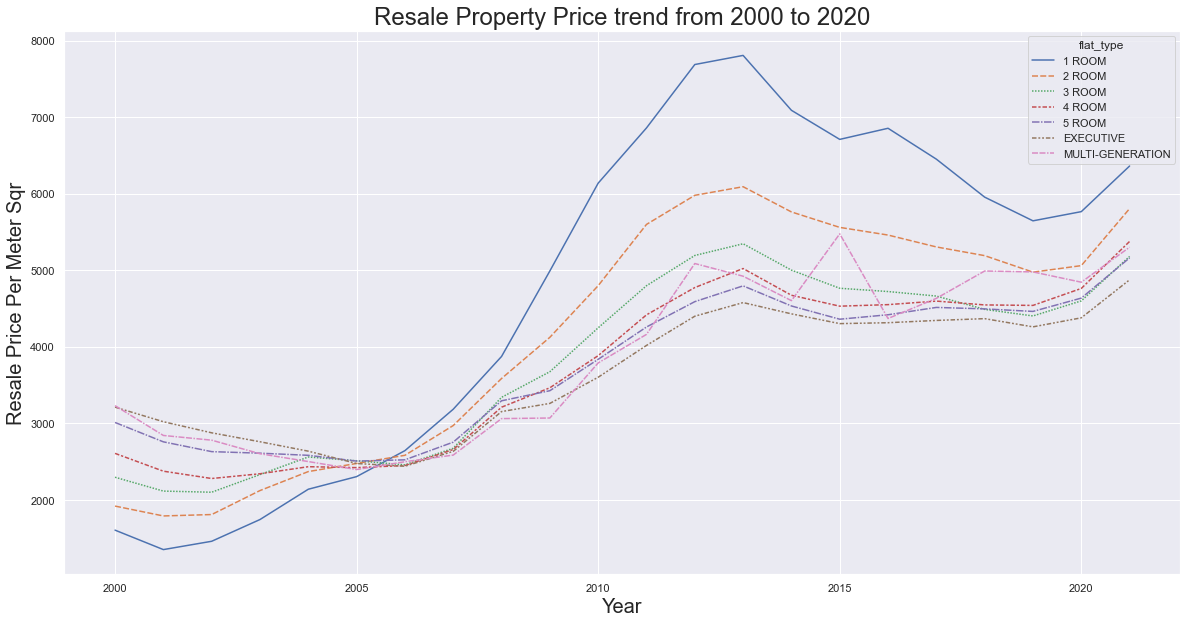

In [221]:
sns.set(rc={'figure.figsize': (20, 10)})
p = sns.lineplot(data=resaledf)
p.set_ylabel('Resale Price Per Meter Sqr',fontsize=20)
p.set_xlabel('Year',fontsize=20)
p.set_title('Resale Property Price trend from 2000 to 2020', fontsize=24)

In [25]:
flat_model = {}
for flat_type in resale_data.flat_type.unique():
    flat_model[flat_type] = list(resale_data[resale_data['flat_type'] == flat_type]['flat_model'].unique())

for k,v in flat_model.items():
    print(k,v)

4 ROOM ['Simplified', 'Improved', 'Model A2', 'Model A', 'New Generation', 'Premium Apartment', 'Standard', 'Adjoined flat', 'DBSS', 'Type S1', 'Premium Apartment Loft', 'Terrace']
5 ROOM ['Improved', 'DBSS', 'Standard', 'Model A', 'Premium Apartment', 'Adjoined flat', 'Model A-Maisonette', 'Type S2', 'Improved-Maisonette', 'Premium Apartment Loft']
3 ROOM ['Improved', 'Model A', 'New Generation', 'Simplified', 'Terrace', 'Standard', 'Premium Apartment', 'DBSS', 'Adjoined flat']
EXECUTIVE ['Apartment', 'Maisonette', 'Adjoined flat', 'Premium Apartment', 'Premium Maisonette']
2 ROOM ['Standard', 'Improved', 'Model A', 'Premium Apartment', '2-room', 'DBSS']
1 ROOM ['Improved']
MULTI-GENERATION ['Multi Generation']


In [204]:
# join population dataset with resale df
joinDf = resaledf.join(populationDf,how='inner')


In [244]:
joinDf.iloc[:,12:18].head()


,Total Population Growth (Per Cent),Resident Population Growth (Per Cent),Population Density (Total Population Per Square Kilometre),Median Age Of Resident Population (Years),Median Age Of Citizen Population (Years),Natural Increase (Number)
2000,1.7,1.4,5900,34.0,34.3,31304
2001,2.7,1.6,6065,34.4,34.8,26084
2002,0.9,1.7,6078,34.7,35.3,24940
2003,0.2,1.6,5939,35.0,35.7,21449
2004,1.3,1.4,5987,35.4,36.2,21314


In [207]:
populationFeatures


['Total Population (Number)',
 'Resident Population (Number)',
 'Singapore Citizen Population (Number)',
 'Permanent Resident Population (Number)',
 'Non-Resident Population (Number)',
 'Total Population Growth (Per Cent)',
 'Resident Population Growth (Per Cent)',
 'Population Density (Total Population Per Square Kilometre)',
 'Median Age Of Resident Population (Years)',
 'Median Age Of Citizen Population (Years)',
 'Natural Increase (Number)',
 'Rate Of Natural Increase (Per Thousand Residents)',
 'Children Residents',
 'Adult Residents',
 'Elderly Residents',
 'Children_Dwellers',
 'Children_Total HDB Dwellings',
 'Children_HDB 1 And 2 Room Flats',
 'Children_HDB 3-Room Flats',
 'Children_HDB 4-Room Flats',
 'Children_HDB 5-Room And Executive Flats',
 'Children_Condominiums & Other Apartments',
 'Children_Landed Properties',
 'Children_Other Types Of Dwelling',
 'Adult_Dwellers',
 'Adult_Total HDB Dwellings',
 'Adult_HDB 1 And 2 Room Flats',
 'Adult_HDB 3-Room Flats',
 'Adult_HDB 4-

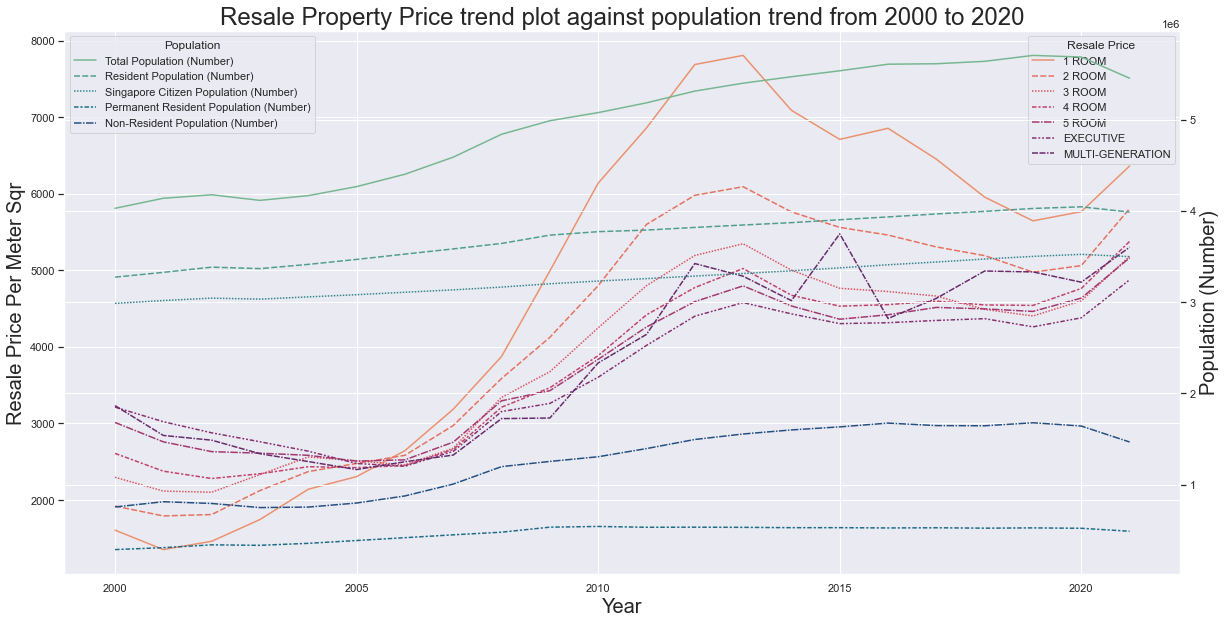

In [239]:
# plot resale price vs population size
sns.set(rc={'figure.figsize': (20, 10)})
p = sns.lineplot(data=resaledf, palette='flare')
p.set_ylabel('Resale Price Per Meter Sqr', fontsize=20)
p.set_xlabel('Year', fontsize=20)
p.set_title('Resale Property Price trend plot against population trend from 2000 to 2020', fontsize=24)
p.legend(loc='upper right', title="Resale Price")
ax2 = plt.twinx()
q = sns.lineplot(data=populationDf.iloc[:,:5], ax=ax2, palette='crest')
q.set_ylabel('Population (Number)',fontsize=20)
q.legend(loc='upper left', title="Population")


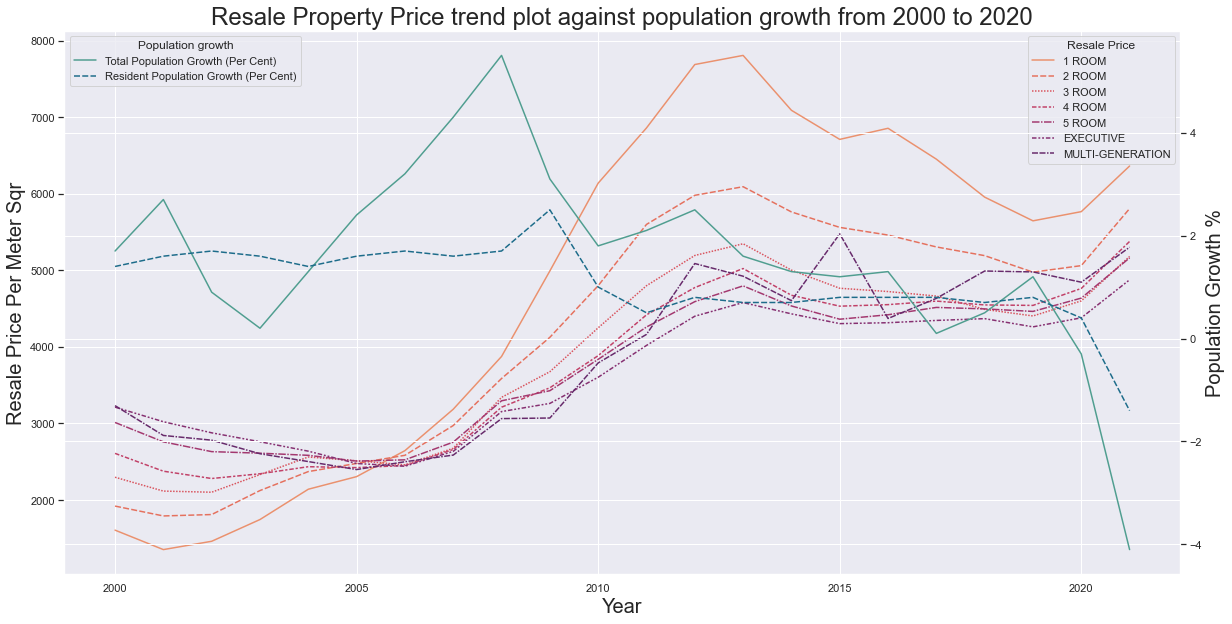

In [238]:
# plot resale price vs population growth
sns.set(rc={'figure.figsize': (20, 10)})
p = sns.lineplot(data=resaledf, palette='flare')
p.set_ylabel('Resale Price Per Meter Sqr', fontsize=20)
p.set_xlabel('Year', fontsize=20)
p.set_title(
    'Resale Property Price trend plot against population growth from 2000 to 2020', fontsize=24)
p.legend(loc='upper right',title="Resale Price")
ax2 = plt.twinx()
q = sns.lineplot(data=populationDf.iloc[:, 5:7], ax=ax2, palette='crest')
q.set_ylabel('Population Growth %', fontsize=20)
q.legend(loc='upper left', title="Population growth")


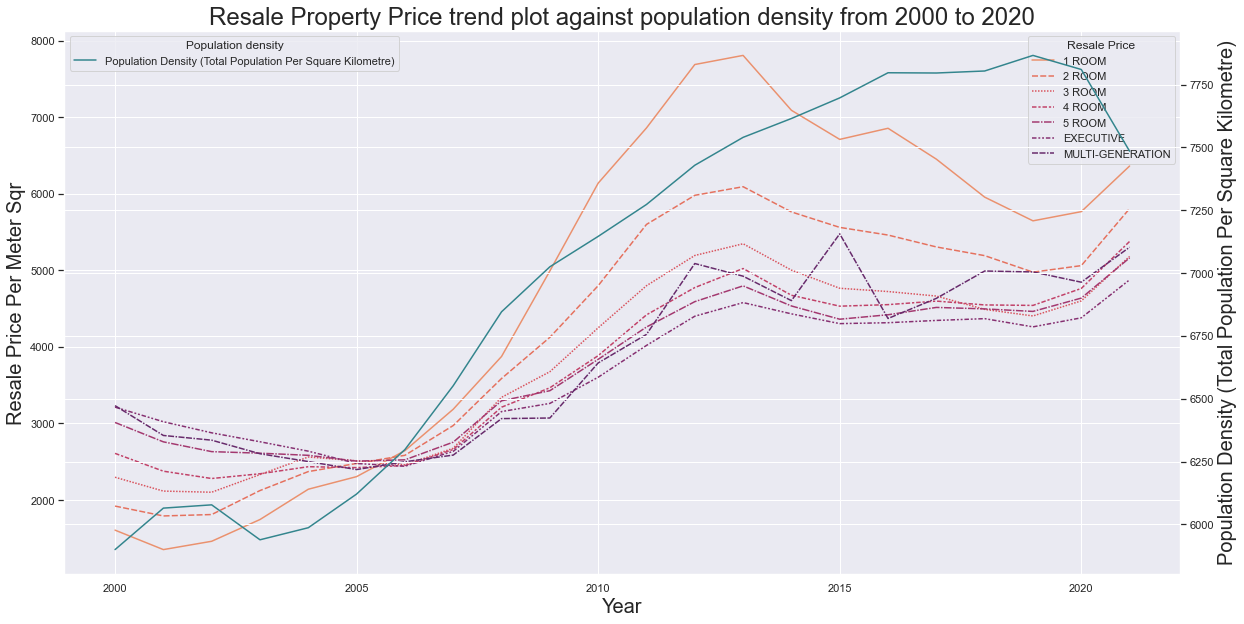

In [252]:
# plot resale price vs population density
sns.set(rc={'figure.figsize': (20, 10)})
p = sns.lineplot(data=resaledf, palette='flare')
p.set_ylabel('Resale Price Per Meter Sqr', fontsize=20)
p.set_xlabel('Year', fontsize=20)
p.set_title(
    'Resale Property Price trend plot against population density from 2000 to 2020', fontsize=24)
p.legend(loc='upper right', title="Resale Price")
ax2 = plt.twinx()
q = sns.lineplot(data=populationDf.iloc[:, 7:8], ax=ax2, palette='crest')
q.set_ylabel(populationDf.iloc[:, 7:8], fontsize=20)
q.legend(loc='upper left', title="Population density")


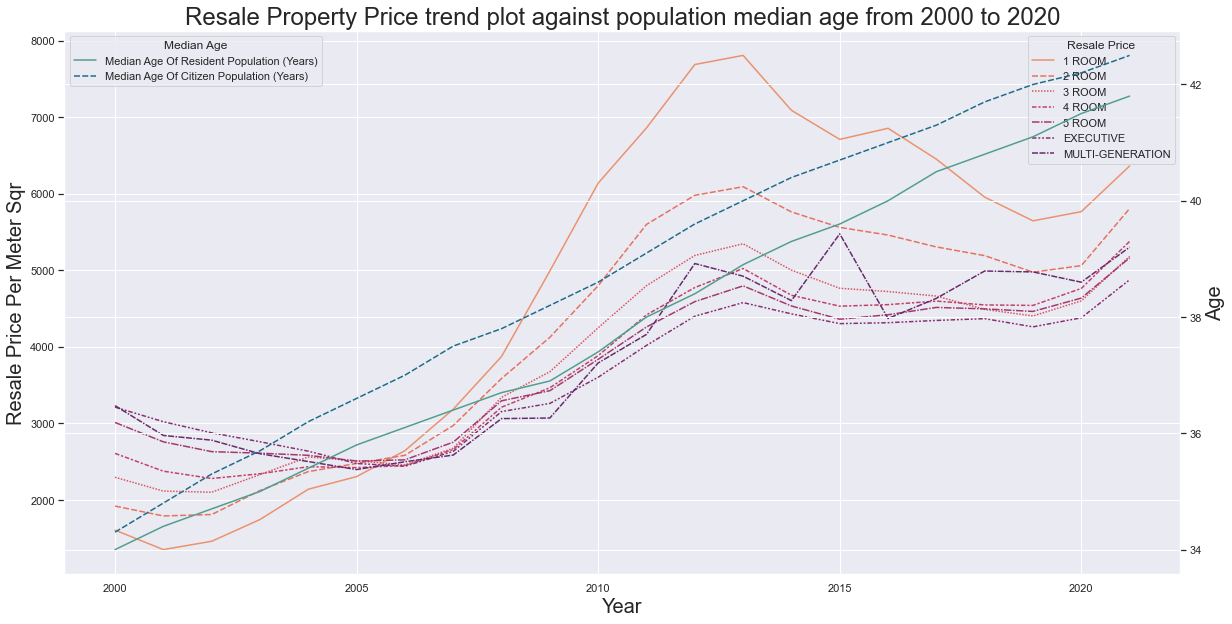

In [255]:
# plot resale price vs age
sns.set(rc={'figure.figsize': (20, 10)})
p = sns.lineplot(data=resaledf, palette='flare')
p.set_ylabel('Resale Price Per Meter Sqr', fontsize=20)
p.set_xlabel('Year', fontsize=20)
p.set_title(
    'Resale Property Price trend plot against population median age from 2000 to 2020', fontsize=24)
p.legend(loc='upper right', title="Resale Price")
ax2 = plt.twinx()
q = sns.lineplot(data=populationDf.iloc[:, 8:10], ax=ax2, palette='crest')
q.set_ylabel('Age', fontsize=20)
q.legend(loc='upper left', title="Median Age")


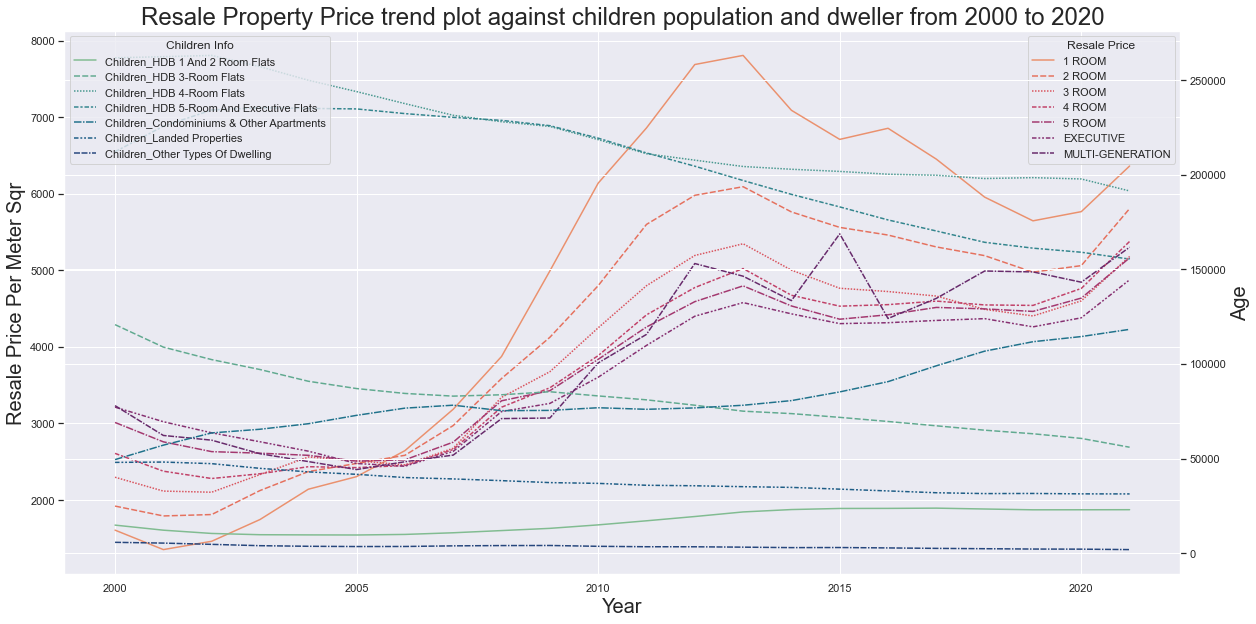

In [263]:
# plot resale price vs children population and dweller info
sns.set(rc={'figure.figsize': (20, 10)})
p = sns.lineplot(data=resaledf, palette='flare')
p.set_ylabel('Resale Price Per Meter Sqr', fontsize=20)
p.set_xlabel('Year', fontsize=20)
p.set_title(
    'Resale Property Price trend plot against children population and dweller from 2000 to 2020', fontsize=24)
p.legend(loc='upper right', title="Resale Price")
ax2 = plt.twinx()
q = sns.lineplot(data=populationDf[[x for x in list(
    populationDf.columns) if 'Children' in x][3:]], ax=ax2, palette='crest')
q.set_ylabel('Population', fontsize=20)
q.legend(loc='upper left', title="Children Info")


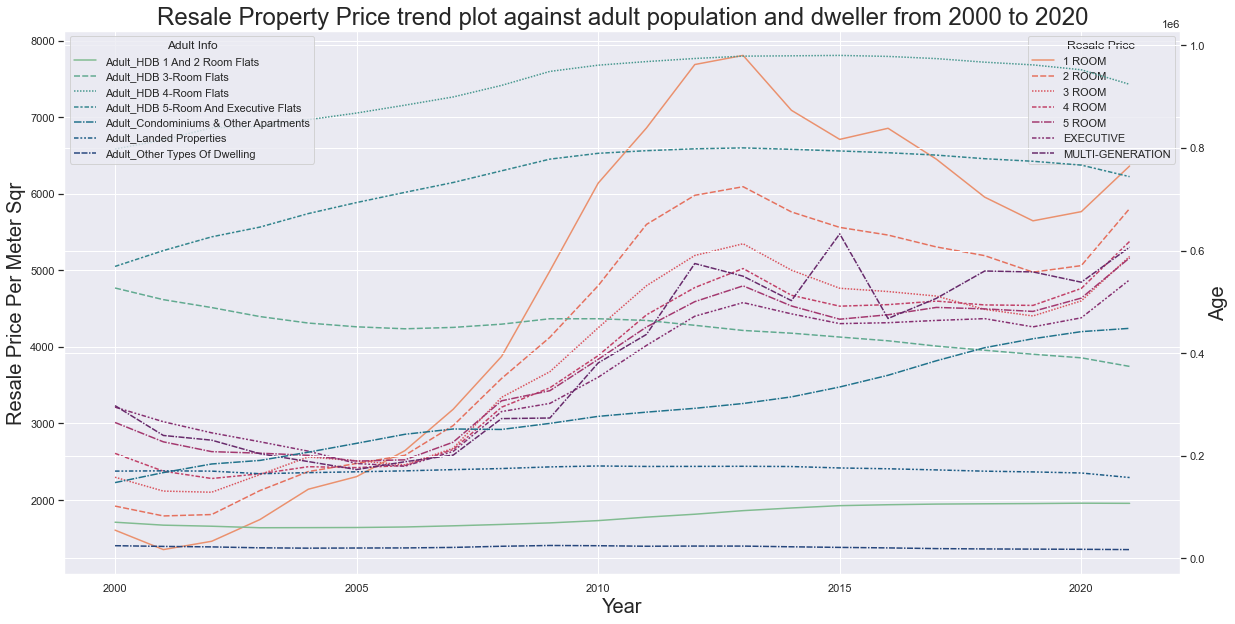

In [262]:
# plot resale price vs adult population and dweller info
sns.set(rc={'figure.figsize': (20, 10)})
p = sns.lineplot(data=resaledf, palette='flare')
p.set_ylabel('Resale Price Per Meter Sqr', fontsize=20)
p.set_xlabel('Year', fontsize=20)
p.set_title(
    'Resale Property Price trend plot against adult population and dweller from 2000 to 2020', fontsize=24)
p.legend(loc='upper right', title="Resale Price")
ax2 = plt.twinx()
q = sns.lineplot(data=populationDf[[x for x in list(
    populationDf.columns) if 'Adult' in x][3:]], ax=ax2, palette='crest')
q.set_ylabel('Population', fontsize=20)
q.legend(loc='upper left', title="Adult Info")


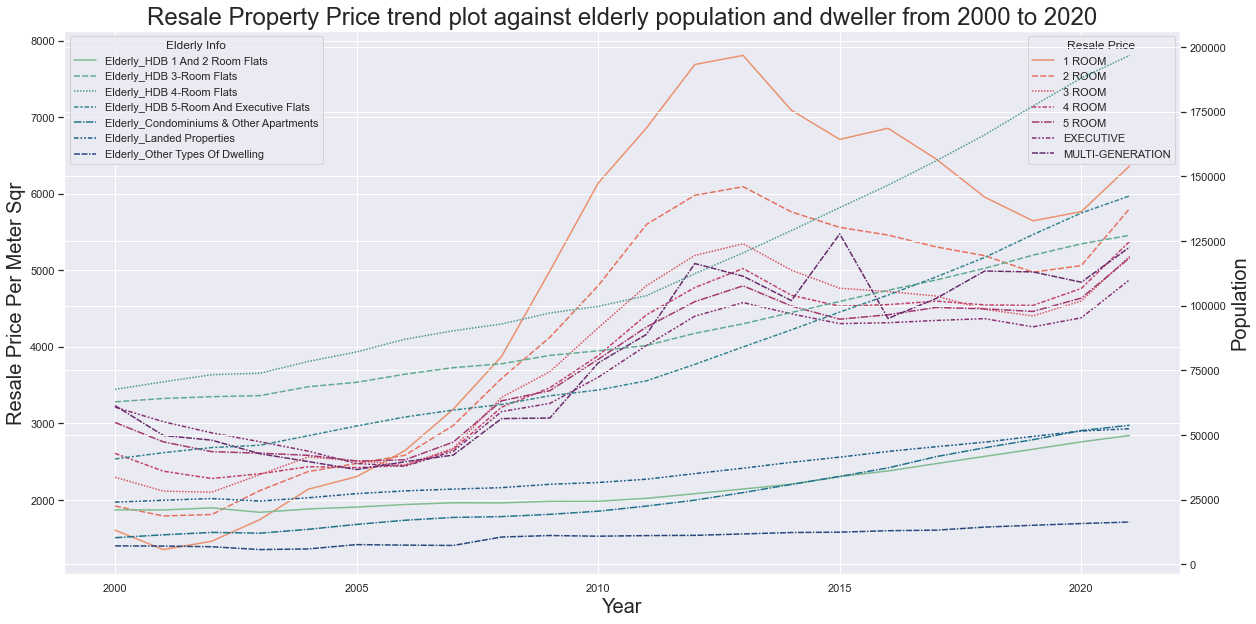

In [264]:
# plot resale price vs elderly population and dweller info
sns.set(rc={'figure.figsize': (20, 10)})
p = sns.lineplot(data=resaledf, palette='flare')
p.set_ylabel('Resale Price Per Meter Sqr', fontsize=20)
p.set_xlabel('Year', fontsize=20)
p.set_title(
    'Resale Property Price trend plot against elderly population and dweller from 2000 to 2020', fontsize=24)
p.legend(loc='upper right', title="Resale Price")
ax2 = plt.twinx()
q = sns.lineplot(data=populationDf[[x for x in list(
    populationDf.columns) if 'Elderly' in x][3:]], ax=ax2, palette='crest')
q.set_ylabel('Population', fontsize=20)
q.legend(loc='upper left', title="Elderly Info")


In [258]:
populationFeatures[12:]

['Children Residents',
 'Adult Residents',
 'Elderly Residents',
 'Children_Dwellers',
 'Children_Total HDB Dwellings',
 'Children_HDB 1 And 2 Room Flats',
 'Children_HDB 3-Room Flats',
 'Children_HDB 4-Room Flats',
 'Children_HDB 5-Room And Executive Flats',
 'Children_Condominiums & Other Apartments',
 'Children_Landed Properties',
 'Children_Other Types Of Dwelling',
 'Adult_Dwellers',
 'Adult_Total HDB Dwellings',
 'Adult_HDB 1 And 2 Room Flats',
 'Adult_HDB 3-Room Flats',
 'Adult_HDB 4-Room Flats',
 'Adult_HDB 5-Room And Executive Flats',
 'Adult_Condominiums & Other Apartments',
 'Adult_Landed Properties',
 'Adult_Other Types Of Dwelling',
 'Elderly_Dwellers',
 'Elderly_Total HDB Dwellings',
 'Elderly_HDB 1 And 2 Room Flats',
 'Elderly_HDB 3-Room Flats',
 'Elderly_HDB 4-Room Flats',
 'Elderly_HDB 5-Room And Executive Flats',
 'Elderly_Condominiums & Other Apartments',
 'Elderly_Landed Properties',
 'Elderly_Other Types Of Dwelling']

In [249]:
populationDf.iloc[:, 7].name

'Population Density (Total Population Per Square Kilometre)'